### Here I apply Principle component analysis and clustering to answer the questions as follows:

1. What will a new case be classified in the cases status?
2. What are the chracteristic share by cases? 


The following codes only examine the probablility 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from collections import defaultdict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
df = pd.read_csv("../data/modeling_data.csv", dtype=str).fillna('NAN')
# take charge_status and charge_depo as porxies

In [54]:
d = defaultdict(LabelEncoder)

# Encoding the variable
fit = df.apply(lambda x: d[x.name].fit_transform(x))
features = fit.drop(["Charge Status","Charge Dispo"], 1)
GrownTruth = fit[["Charge Status","Charge Dispo"]]

# Inverse the encoded
# fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
#df.apply(lambda x: d[x.name].transform(x))

In [55]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=6)
sklearn_transf = sklearn_pca.fit_transform(features)

In [56]:
print(sklearn_pca.explained_variance_ratio_) 

[ 0.58454297  0.30135368  0.06920226  0.02572491  0.00928362  0.00326686]


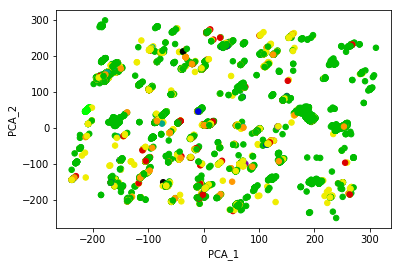

In [90]:
x = sklearn_transf[:,0]
y = sklearn_transf[:,1]
Cluster = GrownTruth["Charge Status"].astype(str)    # Labels of cluster 0 to 3
#centers = np.random.randn(4, 2) 

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=[matplotlib.cm.spectral(float(i)/10) for i in Cluster],
                     s=30 )
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')

In [94]:
from sklearn.cluster import KMeans
agg = KMeans(n_clusters=10, max_iter=500)
agg.fit(features)
result = agg.fit_predict(features)

Clustering techiques can give some initial sense about what are the realtions between cases. However, it is hard to be interpretated.

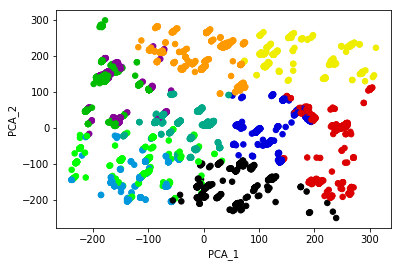

In [95]:
x = sklearn_transf[:,0]
y = sklearn_transf[:,1]
Cluster = result.astype(str)    # Labels of cluster 0 to 3
#centers = np.random.randn(4, 2) 

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=[matplotlib.cm.spectral(float(i)/10) for i in Cluster],
                     s=30 )
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')

#### The adjusted_rand_score shows that the clustering result is good or not. It is better when it close to 1.

In [98]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(GrownTruth["Charge Status"].astype(int), result)

0.040653594040466617

The result is not good :(